In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import animation

tf.compat.v1.disable_eager_execution() # TensorFlow 1.x

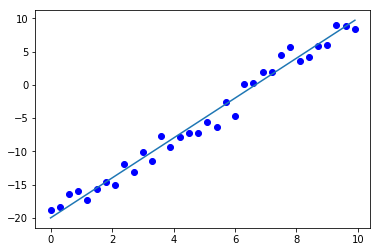

In [2]:
np.random.seed(666)

x = np.arange(0, 10, 0.3)
y = 3 * x - 20
errors = np.random.normal(0, 1.5, y.shape[0])

y_real = y + errors

plt.plot(x, y_real, 'bo')
plt.plot(x, y)

# y = a * x + b  # a == 3, b == -20

53.1445599467236


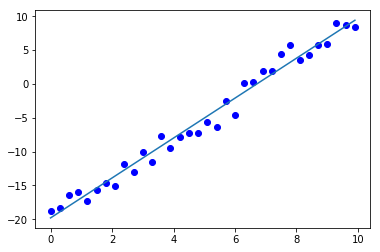

In [3]:
# (x, y_real) -> y = a * x + b ???

a1 = 2.95
b1 = -19.8

plt.plot(x, y_real, 'bo')
plt.plot(x, a1 * x + b1)

error = np.sum((a1 * x + b1 - y_real) ** 2)
print(error)

In [4]:
a = tf.Variable(initial_value=0, dtype=tf.float32)
b = tf.Variable(initial_value=0, dtype=tf.float32)

error = tf.reduce_sum((a * x + b - y_real) ** 2)

opt = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.0003)
opt_op = opt.minimize(error)

opt2 = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.0001)
opt_op2 = opt2.minimize(error)

with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())
    
    for i in range(2000):
        if i % 100 == 0:
            err, a_, b_ = sess.run([error, a, b])
            print('error = {}, {} * x + {}'.format(err, a_, b_))        
        sess.run(opt_op)  # Do step.
    err, a_, b_ = sess.run([error, a, b])
    print('error = {}, {} * x + {}'.format(err, a_, b_))      
    for i in range(500):        
        sess.run(opt_op2)  # Do step.
    err, a_, b_ = sess.run([error, a, b])
    print('error = {}, {} * x + {}'.format(err, a_, b_))      

error = 3543.400634765625, 0.0 * x + 0.0
error = 1280.303466796875, 1.1848968267440796 * x + -8.0704345703125
error = 484.72320556640625, 1.904399037361145 * x + -12.85396671295166
error = 204.92381286621094, 2.331089735031128 * x + -15.690773010253906
error = 106.5199966430664, 2.584134101867676 * x + -17.373111724853516
error = 71.91244506835938, 2.7341973781585693 * x + -18.370790481567383
error = 59.74115753173828, 2.823190450668335 * x + -18.962451934814453
error = 55.460548400878906, 2.8759677410125732 * x + -19.313335418701172
error = 53.95512008666992, 2.9072654247283936 * x + -19.52141571044922
error = 53.4256477355957, 2.9258265495300293 * x + -19.644817352294922
error = 53.23944091796875, 2.9368338584899902 * x + -19.717998504638672
error = 53.17396926879883, 2.943361282348633 * x + -19.761396408081055
error = 53.15092468261719, 2.947232723236084 * x + -19.787134170532227
error = 53.14282989501953, 2.9495279788970947 * x + -19.802392959594727
error = 53.13997268676758, 2.950